In [1]:
from src import *
from sklearn.cluster import KMeans
from matplotlib.colors import to_hex

## Goal

The goal of this notebook is to do create paths (voxel level) to match pairs of regions with highest connectivity paths

## Description
Generate paths according to the functional connectivity of pairs of regions. 
- E.g using highest sum of energy (energy being positive correlation)

### Loading the existing inpainted paths according to regions of interest

In [8]:
wmall = load('./resources/l2regC_scale1_pcc_30/wm_inpainted_all.pkl')
wmreg = load('./resources/l2regC_scale1_pcc_30/wm_inpainted_rec.pkl')


rest_runs = os.listdir('../atlas_data/rstfMRI_eg/rst_fmri_moviedata/')
rst_vols = [nib.load('../atlas_data/rstfMRI_eg/rst_fmri_moviedata/{}'.format(run)) for run in rest_runs]
rest_affine = rst_vols[0].affine

connFilename = '../atlas_data/fiber_atlas/probconnatlas/wm.connatlas.scale1.h5'
hf = h5py.File(connFilename, 'r')

centers = np.array(hf.get('header').get('gmcoords'))
nsubject = hf.get('header').get('nsubjects')[()]
gmregions_names = hf.get('header').get('gmregions')[()]
nb_regions = len(gmregions_names)
bundle_affine = np.array(hf.get('header').get('affine'))[()]

In [56]:
binarize_rest = (rst_vols[0].get_fdata()[:,:,:,0] != 0).astype(float)
border_rest = (np.diff(binarize_rest) != 0).astype(float) # Brain border

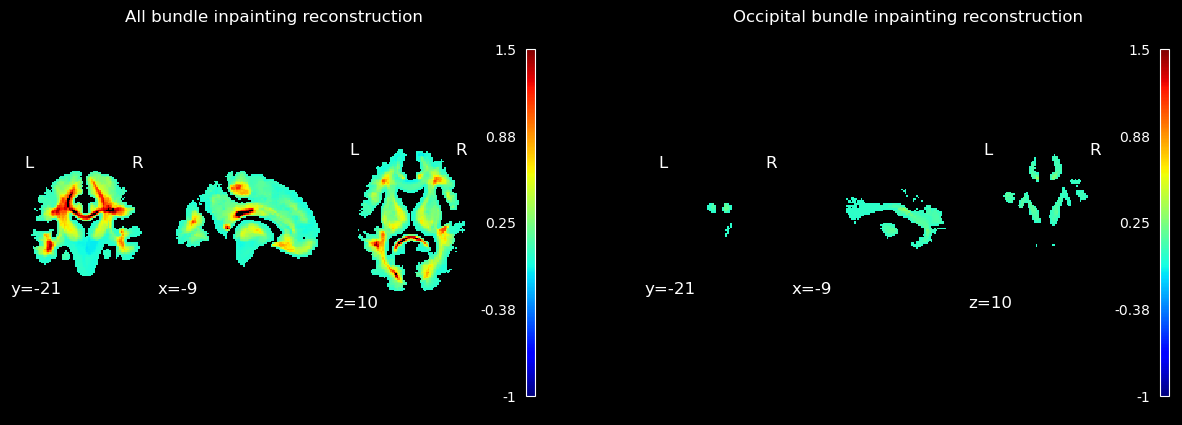

In [9]:
cmap = mpl.colormaps.get_cmap('jet')
cmap.set_extremes(under='black', over='black')
fig, ax = plt.subplots(1,2, figsize=(15,5), facecolor='black')
plot_epi(nib.Nifti1Image(wmall, affine=rest_affine),colorbar=True, cut_coords=(-9,-21,10), 
         cmap=cmap, vmin=-1, vmax=1.5, axes=ax[0], draw_cross=False)
ax[0].set_title('All bundle inpainting reconstruction', color='white')

plot_epi(nib.Nifti1Image(wmreg, affine=rest_affine),colorbar=True, cut_coords=(-9,-21,10), 
         cmap=cmap, vmin=-1, vmax=1.5, axes=ax[1], draw_cross=False)
ax[1].set_title('Occipital bundle inpainting reconstruction', color='white')
plt.show()

In [10]:
binrest = (wmreg >= -1) & (wmreg <= 1)

In [32]:
scatters = volcoord2mnicoord(np.asarray(np.where(binrest)).T, rest_affine)
scatters_border = volcoord2mnicoord(np.asarray(np.where(border_rest)).T, rest_affine)

In [101]:
tmp = (np.diff(binrest.astype(float)) != 0).astype(float)
scatters_tmp = volcoord2mnicoord(np.asarray(np.where(tmp)).T, rest_affine)

In [133]:
# we populate in between nodes by linear interpolation to have a smoother plane
# the order of scatter are more or less done by proximity i.e P[k] and P[k+1] are neighbours most of the time

interpolated_scatters = (scatters[1:] + scatters[:-1]) / 2
interpolated_borders = (scatters_border[1:] + scatters_border[:-1]) / 2

(-83.7, 85.7, -125.7, 87.7)

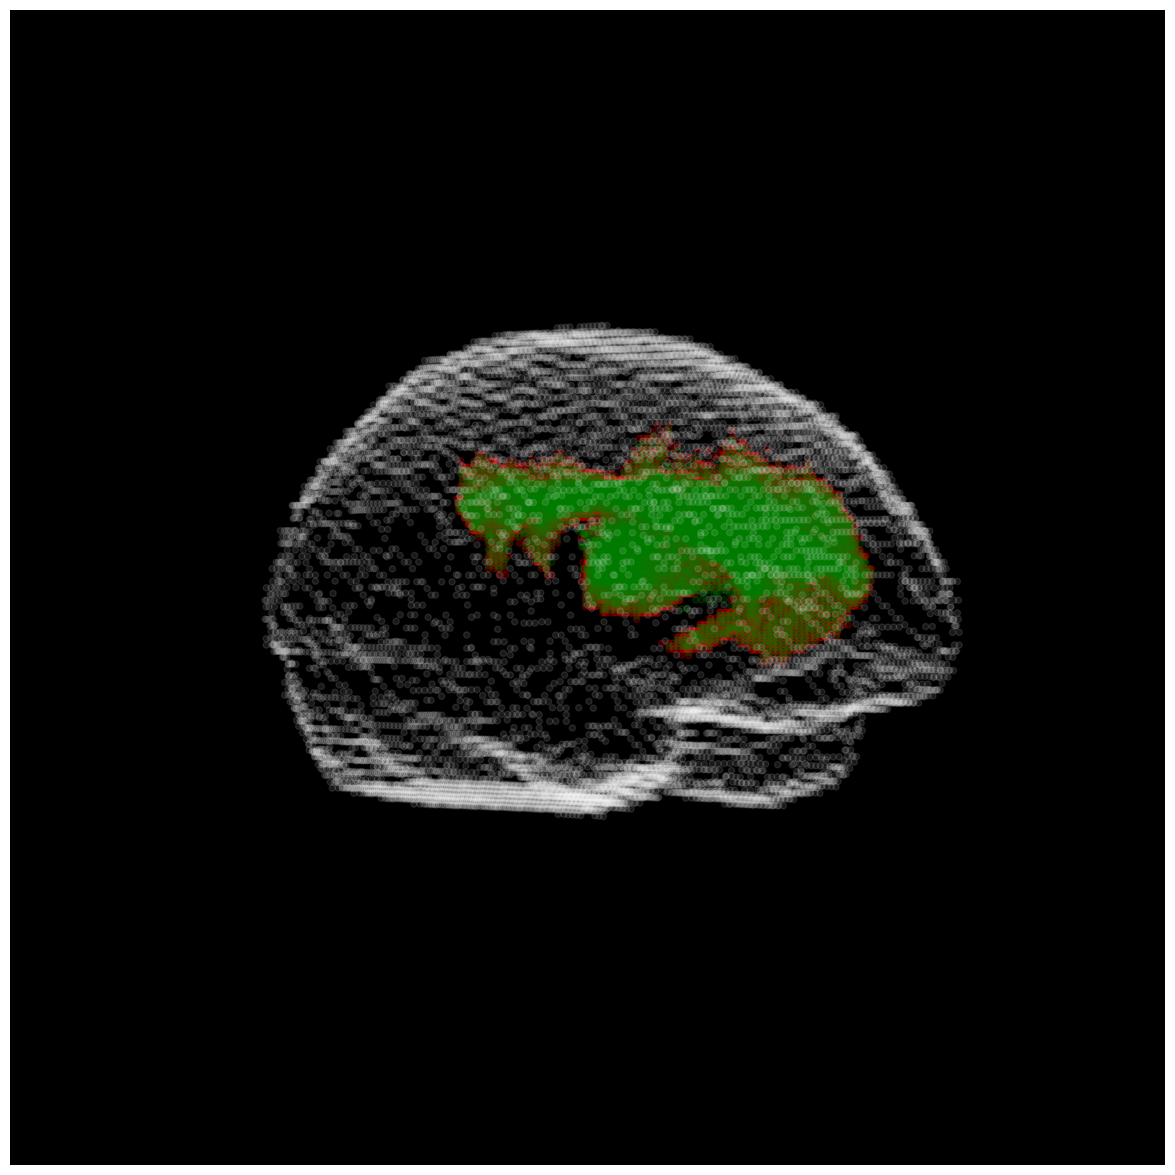

In [135]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection='3d')

ax.view_init(0, -30)
ax.scatter(scatters.T[0], scatters.T[1], scatters.T[2], alpha=0.2, c='r')
ax.scatter(interpolated_scatters.T[0], interpolated_scatters.T[1], interpolated_scatters.T[2], alpha=0.2, c='g')
ax.scatter(scatters_border.T[0], scatters_border.T[1], scatters_border.T[2], alpha=0.1, c='w')
# ax.scatter(interpolated_borders.T[0], interpolated_borders.T[1], interpolated_borders.T[2], alpha=0.1, c='b')
ax.set_facecolor('black')
ax.axis('off')

In [118]:
def plot3dmesh(R, BG, frames=360, interval=20, viewinit=(0,-30), fps=20, gifname='mesh.gif'):
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(projection='3d')

    ax.view_init(viewinit[0], viewinit[1])

    def init():
        ax.scatter(R[0], R[1], R[2], alpha=0.2, c='r')
        ax.scatter(BG[0], BG[1], BG[2], alpha=0.1, c='w')
        ax.set_facecolor('black')
        ax.axis('off')
        return fig,

    def animate(i):
        ax.view_init(elev=10., azim=i)

    # Animate
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                frames=frames, interval=interval)
        
    writergif = animation.PillowWriter(fps=fps)
    anim.save(gifname, writer=writergif)

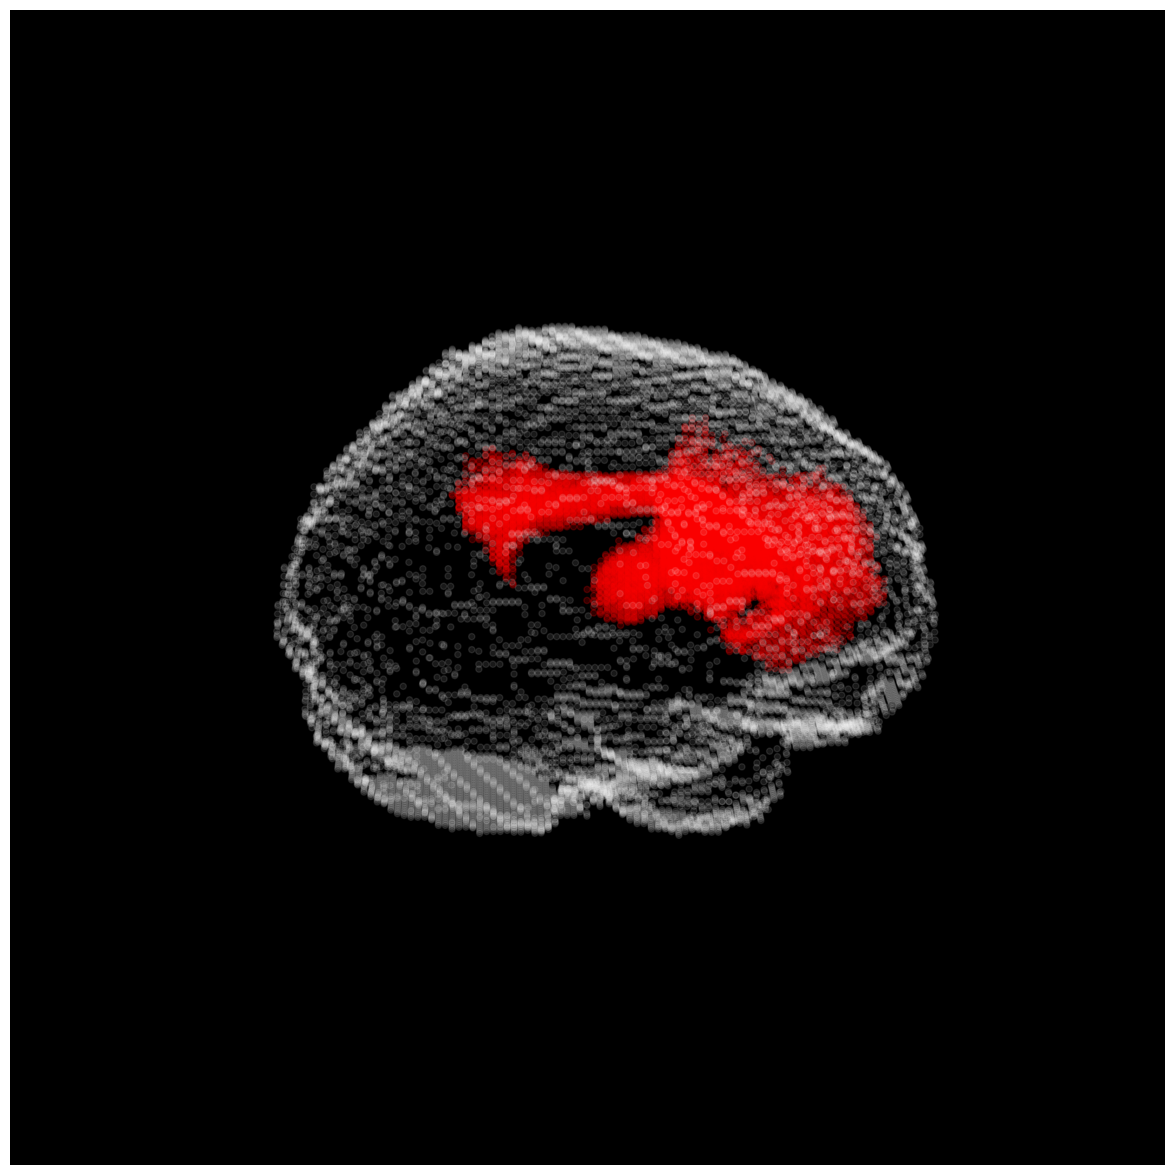

In [119]:
plot3dmesh(scatters.T, scatters_border.T)

In [2]:
wmall = load('./resources/l2regC_scale1_occipital_30_rec2/wm_inpainted_all.pkl')
wmreg = load('./resources/l2regC_scale1_occipital_30_rec2/wm_inpainted_rec.pkl')

wmall2 = load('./resources/l2regC_scale1_infparietal_30_rec2/wm_inpainted_all.pkl')
wmreg2 = load('./resources/l2regC_scale1_infparietal_30_rec2/wm_inpainted_rec.pkl')


rest_runs = os.listdir('../atlas_data/rstfMRI_eg/rst_fmri_moviedata/')
rst_vols = [nib.load('../atlas_data/rstfMRI_eg/rst_fmri_moviedata/{}'.format(run)) for run in rest_runs]
rest_affine = rst_vols[0].affine

connFilename = '../atlas_data/fiber_atlas/probconnatlas/wm.connatlas.scale1.h5'
hf = h5py.File(connFilename, 'r')

centers = np.array(hf.get('header').get('gmcoords'))
nsubject = hf.get('header').get('nsubjects')[()]
gmregions_names = hf.get('header').get('gmregions')[()]
nb_regions = len(gmregions_names)
bundle_affine = np.array(hf.get('header').get('affine'))[()]

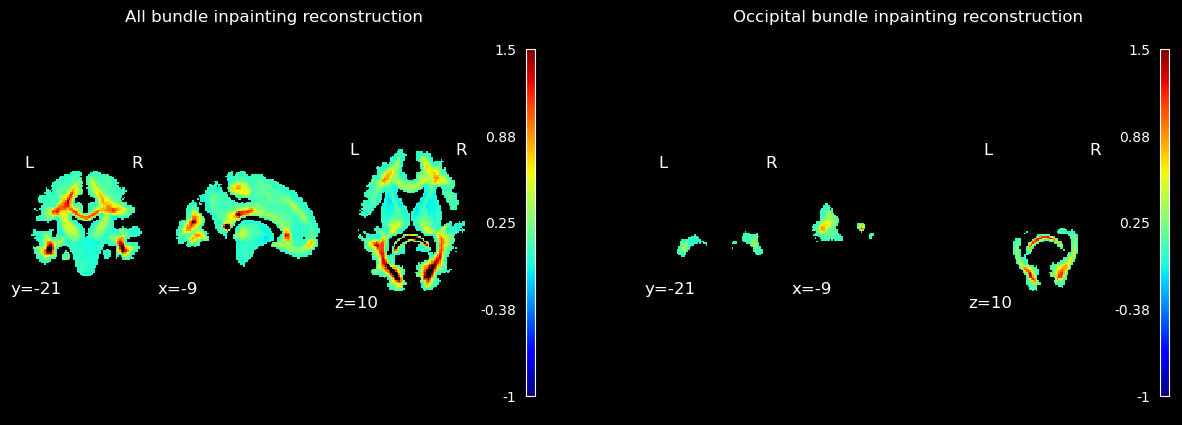

In [6]:
cmap = mpl.colormaps.get_cmap('jet')
cmap.set_extremes(under='black', over='black')
fig, ax = plt.subplots(1,2, figsize=(15,5), facecolor='black')
plot_epi(nib.Nifti1Image(wmall, affine=rest_affine),colorbar=True, cut_coords=(-9,-21,10), 
         cmap=cmap, vmin=-1, vmax=1.5, axes=ax[0], draw_cross=False)
ax[0].set_title('All bundle inpainting reconstruction', color='white')

plot_epi(nib.Nifti1Image(wmreg, affine=rest_affine),colorbar=True, cut_coords=(-9,-21,10), 
         cmap=cmap, vmin=-1, vmax=1.5, axes=ax[1], draw_cross=False)
ax[1].set_title('Occipital bundle inpainting reconstruction', color='white')
plt.show()

### Path Selection
From the regions part of bundles we select a path (array of voxels that lead from the region of interest to any other regions)

this would then be a path choice that makes sense in the bundle idea
we cannot however extract a single streamline path due to the fact that we are working with bundles only

In [4]:
# Get the bundle from one arbitrary region to the region of interest
bundle_vox = load('./resources/l2regC_scale1_occipital_30_rec2/bundlevox_coords.pkl')
bundle_vox2 = load('./resources/l2regC_scale1_infparietal_30_rec2/bundlevox_coords.pkl')

In [5]:
# isolating region of interest that we want to compute the connectivity inpainting from
region_of_interest = ['ctx-rh-lateraloccipital', 'ctx-lh-lateraloccipital']
index_of_interest = [np.where(gmregions_names.astype(str) == r)[0][0] 
                     for r in region_of_interest]

In [6]:
thresh_subjapp = int(np.ceil(nsubject * 0.3)) # consider bundles that appaear at least in 30 % of the subjects    

bundles_labels = []
for i in tqdm(range(1,nb_regions + 1)):
    for j in range(i,nb_regions + 1):
        tmp = get_bundles_betweenreg(hf, i, j, verbose=False)
        if tmp is None: continue
        if np.sum(tmp[:,3] >= (thresh_subjapp)) == 0: continue
        bundles_labels.append((i,j))

100%|██████████| 95/95 [00:29<00:00,  3.18it/s]


In [7]:
# get_path from given index to region of interest
tidx = 18
print(gmregions_names[tidx])
bundle_index_target = []
for k in range(len(bundles_labels)):
    i,j = bundles_labels[k]
    cond1 = ((i in index_of_interest) or (j in index_of_interest))
    cond2 = (i==tidx) or (j==tidx)
    if cond1 and cond2:
        bundle_index_target.append(k)
bundle_index_target

b'ctx-rh-inferiorparietal'


[493, 523]

In [8]:
# create mask of paths to then populate with wmreg inpainted and then generate paths
pathcoords = np.concatenate([bundle_vox[493], bundle_vox[523]])
path2inpaint = np.sign(wmreg) * -100 # out of bounds making

for coords in pathcoords:
    x,y,z = coords
    path2inpaint[x,y,z] = 1.0

pathcoords = np.concatenate([bundle_vox[493], bundle_vox[523]])
path2inpaint = np.sign(wmreg) * -100 # out of bounds making

In [9]:
restraint_path = path2inpaint * wmreg
restraint_path2 = path2inpaint * wmreg2

In [16]:
# thresholding
thresh = 0.8
binrest = ((restraint_path >= -1) & (restraint_path <= 1) & ((restraint_path <= -thresh) | (restraint_path >= thresh)))
binrest2 = ((restraint_path2 >= -1) & (restraint_path2 <= 1) & ((restraint_path2 <= -thresh) | (restraint_path2 >= thresh)))

In [17]:
volcolors = np.empty(binrest.shape, dtype=object)
volcolors[binrest==1] = 'red'

volcolors2 = np.empty(binrest.shape, dtype=object)
volcolors2[binrest2==1] = 'green'

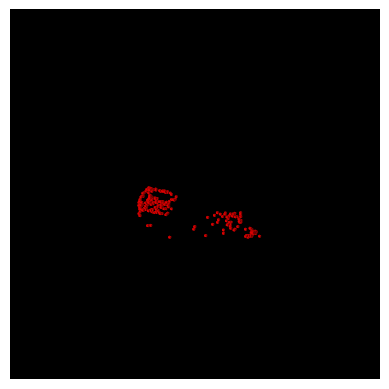

In [18]:
ax = plt.figure().add_subplot(projection='3d',)
ax.voxels(binrest, facecolors=volcolors)
ax.set_facecolor('black')
ax.axis('off')
plt.show()

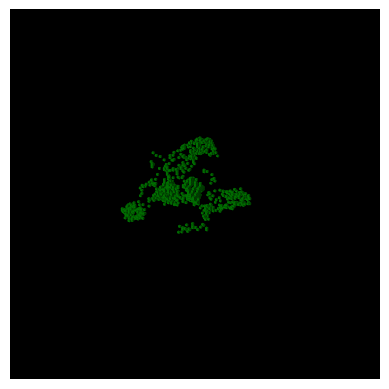

In [19]:
ax = plt.figure().add_subplot(projection='3d',)
ax.voxels(binrest2, facecolors=volcolors2)
ax.set_facecolor('black')
ax.axis('off')
plt.show()

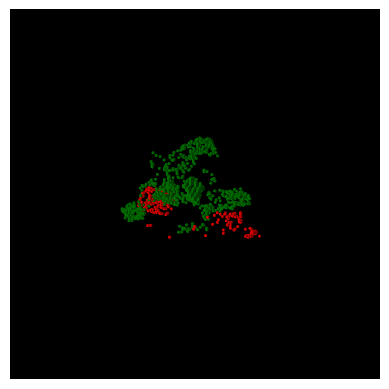

In [20]:
ax = plt.figure().add_subplot(projection='3d',)

ax.voxels(binrest, facecolors=volcolors)
ax.voxels(binrest2, facecolors=volcolors2)
ax.set_facecolor('black')
ax.axis('off')
plt.show()

#### Display region path frm region of interest to all other regions